In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Distribuição das notas

In [2]:
#importar banco de dados de matriculas em 2017.2
#http://dados.ufrn.br/dataset/matriculas-componentes
#cada linha apresenta o registro da nota de um discente em uma unidade de um componente curricular
matriculas = pd.read_csv('data/matricula-componente-20172', delimiter=';')
matriculas.head(10)

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao
0,57610457,0efbb9328136afcae8d0ecc17296e94e,6633741.0,NaN,NaN,NaN,NaN,NaN,NaN,DESISTENCIA
1,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,3.0,0.0,f,0.0,0.0,48.0,CANCELADO
2,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,2.0,0.0,f,0.0,0.0,48.0,CANCELADO
3,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,1.0,0.0,f,0.0,0.0,48.0,CANCELADO
4,57610457,7c64aa349e5565426721790cfd03a326,2000030.0,1.0,8.5,f,0.0,9.2,3.0,APROVADO
5,57610457,7c64aa349e5565426721790cfd03a326,2000030.0,3.0,9.7,f,0.0,9.2,3.0,APROVADO
6,57610457,7c64aa349e5565426721790cfd03a326,2000030.0,2.0,9.4,f,0.0,9.2,3.0,APROVADO
7,57610457,a0e2a12d4ebf86dac1e9c234905e2082,2000030.0,3.0,7.5,f,0.0,5.6,6.0,APROVADO POR NOTA
8,57610457,a0e2a12d4ebf86dac1e9c234905e2082,2000030.0,2.0,3.7,f,0.0,5.6,6.0,APROVADO POR NOTA
9,57610457,a0e2a12d4ebf86dac1e9c234905e2082,2000030.0,1.0,5.7,f,0.0,5.6,6.0,APROVADO POR NOTA


In [3]:
#agrupar matriculas por turma e discente e resgatar a media final de cada aluno
medias_aluno = matriculas.groupby(['id_turma', 'discente']).first()['media_final']

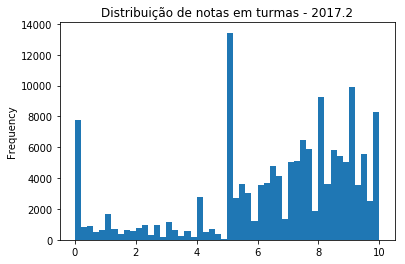

In [4]:
medias_aluno.plot(kind='hist', bins=50, title='Distribuição de notas em turmas - 2017.2')

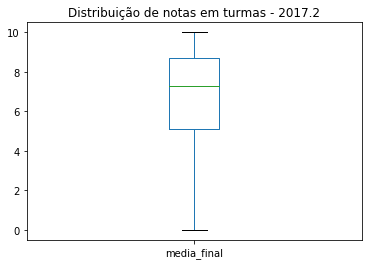

In [5]:
medias_aluno.plot(kind='box', title='Distribuição de notas em turmas - 2017.2')

#### Médias por cursos de graduação

In [6]:
#importar informações sobre os cursos de graduação da UFRN
#http://dados.ufrn.br/dataset/cursos-de-graduacao
cursos = pd.read_csv('data/cursos-graduacao', delimiter=';')
cursos.head()

,id_curso,nome,id_coordenador,coordenador,situacao_curso,nivel_ensino,grau_academico,modalidade_educacao,area_conhecimento,tipo_oferta,...,municipio,campus,id_unidade_responsavel,unidade_responsavel,website,data_funcionamento,codigo_inep,dou,portaria_reconhecimento,convenio_academico
0,2000002,ADMINISTRAÇÃO,NaN,NaN,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,NATAL,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,http://sol.ccsa.ufrn.br/ccsa/areas/adm/adminis...,1971-09-16,12311.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN
1,2000004,ADMINISTRAÇÃO,24415.0,ANDREA CRISTINA SANTOS DE JESUS,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,CURRAIS NOVOS,Campus Currais Novos,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,NaN,1978-09-15,12355.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN
2,15315770,ADMINISTRAÇÃO PÚBLICA,23122.0,MATILDE MEDEIROS DE ARAÚJO,ATIVO,GRADUAÇÃO,BACHARELADO,A Distância,Ciências Sociais Aplicadas,Regular,...,NATAL,NaN,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,NaN,NaN,1151028.0,2014-04-11,Portaria nº 226/2014 - DIREG/MEC,NaN
3,2576632,AGRONOMIA,5758350.0,JOSE HAMILTON DA COSTA FILHO,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Agrárias,Regular,...,MACAÍBA,NaN,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,NaN,NaN,1127694.0,2017-07-28,Portaria Nº 797/2017 - MEC,NaN
4,94598200,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,5757908.0,TANIRO CHACON RODRIGUES,ATIVO,GRADUAÇÃO,TECNOLÓGICO,Presencial,Outra,Anual,...,MACAÍBA,NaN,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,NaN,NaN,1188193.0,2015-12-24,Portaria nº 1034/2015 - DIREG/MEC,NaN


In [15]:
#separar matriculas referentes a cursos de graduação
matriculas = matriculas[matriculas.id_curso.isin(cursos.id_curso)]

In [16]:
#agrupar matricular por turma e discente e, posteriormente, por curso
medias = matriculas.groupby(['id_turma', 'discente']).first().groupby('id_curso').mean()['media_final'].to_frame().reset_index()

In [17]:
#resgatar o nome do curso a partir do id
medias['nome_curso'] = medias_curso.id_curso.apply(lambda x: cursos.loc[cursos.id_curso==x, 'nome'].values[0])

In [18]:
print("Cursos com menores médias entre alunos: ")
medias.sort_values('media_final').head()

Cursos com menores médias entre alunos: 


,id_curso,media_final,nome_curso
51,2000144.0,4.690051,QUÍMICA
71,10320810.0,4.795246,CIÊNCIAS E TECNOLOGIA
33,2000054.0,4.796296,MATEMÁTICA
49,2000124.0,4.956987,FÍSICA
60,3156200.0,4.980397,QUÍMICA DO PETRÓLEO


In [19]:
print("Cursos com maiores médias entre alunos: ")
medias.sort_values('media_final').tail()

Cursos com maiores médias entre alunos: 


,id_curso,media_final,nome_curso
93,104831949.0,8.512388,MEDICINA
92,102191189.0,8.579004,LICENCIATURA EM CIÊNCIAS SOCIAIS
12,2000019.0,8.787424,DIREITO
85,85436676.0,9.040952,EDUCAÇÃO FÍSICA
41,2000066.0,9.133514,PSICOLOGIA


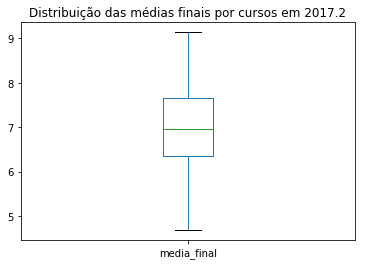

In [21]:
medias.media_final.plot(kind='box', title='Distribuição das médias finais por cursos em 2017.2')

#### Taxas de aprovação, reprovação e trancamentos/cancelamentos por curso

In [22]:
#verificar os status das matrículas
matriculas.descricao.unique()

array(['DESISTENCIA', 'CANCELADO', 'APROVADO', 'APROVADO POR NOTA',
       'REPROVADO POR MÉDIA E POR FALTAS', 'REPROVADO', 'TRANCADO',
       'INDEFERIDO', 'REPROVADO POR NOTA', 'EXCLUIDA',
       'REPROVADO POR NOTA E FALTA', 'REPROVADO POR FALTAS'], dtype=object)

In [23]:
#selecionar matriculas em cursos de graduação e excluir registros com status
#'DESISTENCIA', 'INDEFERIDO', 'DISPENSADO', 'EM ESPERA', 'CUMPRIU', 'AGUARDANDO DEFERIMENTO'
matriculas = matriculas[matriculas.id_curso.isin(cursos.id_curso) & 
                        matriculas.descricao.isin(['CANCELADO', 'APROVADO', 'APROVADO POR NOTA',
                                                   'REPROVADO POR MÉDIA E POR FALTAS', 'REPROVADO', 'TRANCADO',
                                                   'REPROVADO POR NOTA', 'REPROVADO POR NOTA E FALTA', 
                                                   'REPROVADO POR FALTAS'])
                       ]

#uniformizar o status
matriculas.loc[matriculas.descricao.isin(['APROVADO', 'APROVADO POR NOTA']), 'descricao'] = 'APROVADO'
matriculas.loc[matriculas.descricao.isin(['REPROVADO POR MÉDIA E POR FALTAS', 'REPROVADO', 'REPROVADO POR NOTA', 'REPROVADO POR NOTA E FALTA', 'REPROVADO POR FALTAS']), 'descricao'] = 'REPROVADO'
matriculas.loc[matriculas.descricao.isin(['TRANCADO', 'CANCELADO']), 'descricao'] = 'TRANCADO/CANCELADO'

#adicionar coluna booleana para indicar cada status (aprovado/reprovado/trancado ou cancelado)
matriculas = pd.concat([matriculas, pd.get_dummies(matriculas.descricao)], axis=1)

In [24]:
matriculas.head()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,APROVADO,REPROVADO,TRANCADO/CANCELADO
1,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,3.0,0.0,f,0.0,0.0,48.0,TRANCADO/CANCELADO,0,0,1
2,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,2.0,0.0,f,0.0,0.0,48.0,TRANCADO/CANCELADO,0,0,1
3,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,1.0,0.0,f,0.0,0.0,48.0,TRANCADO/CANCELADO,0,0,1
4,57610457,7c64aa349e5565426721790cfd03a326,2000030.0,1.0,8.5,f,0.0,9.2,3.0,APROVADO,1,0,0
5,57610457,7c64aa349e5565426721790cfd03a326,2000030.0,3.0,9.7,f,0.0,9.2,3.0,APROVADO,1,0,0


In [25]:
#agrupar por turma e discente, para resgatar o registro da primeira unidade (é suficiente)
#depois, agrupar por curso para verificar o indice para cada status, utilizando a media das colunas que indicam os status
taxas_curso = matriculas.groupby(['id_turma', 'discente']).first().groupby('id_curso').mean()[['APROVADO','REPROVADO','TRANCADO/CANCELADO']].reset_index()

#resgatar o nome do curso a partir do id
taxas_curso['nome_curso'] = taxas_curso.id_curso.apply(lambda x: cursos.loc[cursos.id_curso==x, 'nome'].values[0])

In [26]:
print("Cursos com maiores índices de aprovação: ")
taxas_curso.sort_values('APROVADO', ascending=False).head()

Cursos com maiores índices de aprovação: 


,id_curso,APROVADO,REPROVADO,TRANCADO/CANCELADO,nome_curso
85,85436676.0,1.000000,0.000000,0.000000,EDUCAÇÃO FÍSICA
84,85436489.0,1.000000,0.000000,0.000000,MATEMÁTICA
92,102191189.0,0.992933,0.000000,0.007067,LICENCIATURA EM CIÊNCIAS SOCIAIS
35,2000056.0,0.981635,0.003027,0.015338,MEDICINA
93,104831949.0,0.970662,0.005618,0.023720,MEDICINA


In [27]:
print("Cursos com maiores índices de reprovação: ")
taxas_curso.sort_values('REPROVADO', ascending=False).head()

Cursos com maiores índices de reprovação: 


,id_curso,APROVADO,REPROVADO,TRANCADO/CANCELADO,nome_curso
51,2000144.0,0.558214,0.344498,0.097289,QUÍMICA
33,2000054.0,0.474747,0.282828,0.242424,MATEMÁTICA
71,10320810.0,0.556216,0.280428,0.163357,CIÊNCIAS E TECNOLOGIA
49,2000124.0,0.634615,0.267483,0.097902,FÍSICA
60,3156200.0,0.565591,0.258065,0.176344,QUÍMICA DO PETRÓLEO


In [28]:
print("Cursos com maiores índices de trancamentos/cancelamentos: ")
taxas_curso.sort_values('TRANCADO/CANCELADO', ascending=False).head()

Cursos com maiores índices de trancamentos/cancelamentos: 


,id_curso,APROVADO,REPROVADO,TRANCADO/CANCELADO,nome_curso
88,94598200.0,0.593525,0.154676,0.251799,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
33,2000054.0,0.474747,0.282828,0.242424,MATEMÁTICA
73,10426760.0,0.663163,0.112454,0.224383,GESTÃO DE POLÍTICAS PÚBLICAS
62,6633741.0,0.563739,0.212465,0.223796,CIÊNCIAS ATUARIAIS
87,92127264.0,0.559803,0.221191,0.219006,TECNOLOGIA DA INFORMAÇÃO


#### Dados socioeconômicos de discentes

In [29]:
#importar banco de dados socioeconomicos de discentes
#http://dados.ufrn.br/dataset/dados-socio-economicos-de-discentes
dados_socio = pd.read_csv('data/dados-socio-economicos-20171.csv', delimiter=';')
dados_socio.head()

,id_discente,ano,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia
0,9098c14ef1ad865247b2abda52806775,2017,1,2000.0,Todo em escola particular,f,f,f,f
1,694c169b65f2043aa95138e0037c8908,2017,1,3000.0,Todo em escola publica,f,f,f,f
2,bdd599acd452057916e6b4f177baf6a9,2017,1,1000.0,Todo em escola publica,f,f,f,f
3,cf43986a0745aa181201a9df000d5368,2017,1,4600.0,Todo em escola publica,f,f,f,f
4,e6c6a2cf710c27fe7c723c6fc8637624,2017,1,4500.0,Todo em escola publica,f,f,f,f


In [30]:
dados_socio.shape

(13916, 9)

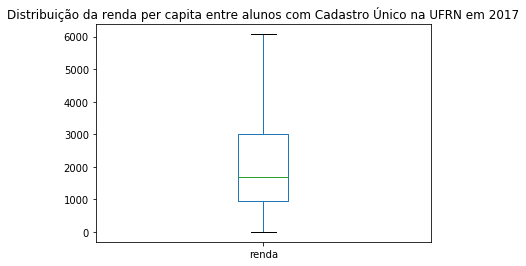

In [31]:
dados_socio.renda.plot(kind='box', showfliers=False, title='Distribuição da renda per capita entre alunos com Cadastro Único na UFRN em 2017')

In [48]:
dados_socio = pd.concat([dados_socio, pd.get_dummies(dados_socio.escola_ens_medio)], axis=1)
dados_socio[['possui_bolsa_pesquisa','possui_auxilio_alimentacao','possui_auxilio_transporte','possui_auxilio_residencia_moradia']] = dados_socio[['possui_bolsa_pesquisa','possui_auxilio_alimentacao','possui_auxilio_transporte','possui_auxilio_residencia_moradia']].applymap(lambda x: 1 if (x=='t') else 0)

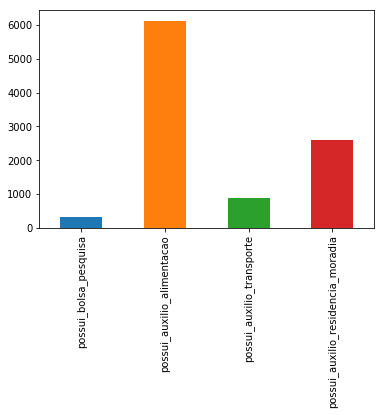

In [46]:
escolas = dados_socio.sum()[['possui_bolsa_pesquisa', 'possui_auxilio_alimentacao',
       'possui_auxilio_transporte', 'possui_auxilio_residencia_moradia']]
escolas.plot(kind='bar')

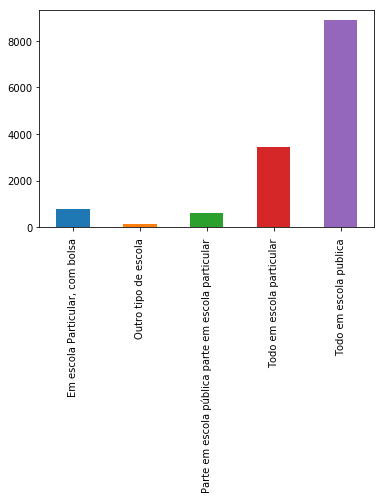

In [45]:
escolas = dados_socio.sum()[['Em escola Particular, com bolsa ', 'Outro tipo de escola ',
       'Parte em escola pública parte em escola particular ',
       'Todo em escola particular ', 'Todo em escola publica ']]
escolas.plot(kind='bar')

#### Dados complementares de discentes

In [33]:
#importar banco de dados complementares de discentes
#http://dados.ufrn.br/dataset/dados-socio-economicos-de-discentes
dados_comp = pd.read_csv('data/dados-pessoais-discentes', delimiter=';')
dados_comp.head()

,id_discente,sexo,data_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,forma_ingresso,ano_ingresso,periodo_ingresso,cotista
0,0e356f33d9f25c70bd7b98ef1bd1ecd4,M,03-10-1943,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,NEOPOLIS,GRADUAÇÃO,VESTIBULAR,1969,1.0,f
1,a3f7753971d7ca9c1648616b1f7e4c48,M,21-02-1949,Não Informado,Rio de Janeiro,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
2,d29e0a56e3cc973750e2d2cbabedc449,F,09-09-1947,Não Informado,NaN,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
3,d4f89fe5c6dd43692b3c1fc4ce324fd5,M,22-04-1949,Não Informado,Rio Grande do Norte,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
4,e2f244371122aea4140427ada6f391b4,M,21-03-1944,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,ALECRIM,GRADUAÇÃO,VESTIBULAR,1970,1.0,f


In [34]:
#agrupar por turma e discente, para resgatar o registro da primeira unidade (é suficiente)

#adicionar coluna booleana para indicar cada sexo
dados_comp = pd.concat([dados_comp, pd.get_dummies(dados_comp.sexo)], axis=1)

#depois, agrupar por sexo para verificar o indice de ingressantes em cada um
taxas_sexo = dados_comp.groupby('ano_ingresso').mean()[['M','F']].reset_index()

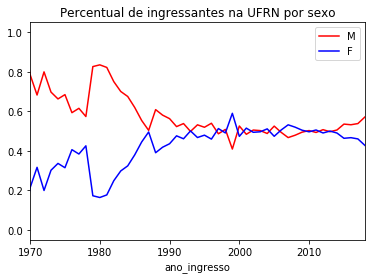

In [35]:
ax1 = taxas_sexo.plot(x='ano_ingresso', y='M', xlim=[1970, 2018], color='r', title='Percentual de ingressantes na UFRN por sexo')
taxas_sexo.plot(x='ano_ingresso', y='F', xlim=[1970, 2018], color='b', ax=ax1)

In [36]:
taxas_sexo.tail()

,ano_ingresso,M,F
46,2014,0.505925,0.490605
47,2015,0.535764,0.463993
48,2016,0.532494,0.467124
49,2017,0.538429,0.460855
50,2018,0.571613,0.428172
